In [32]:
import numpy as np
import pandas as pd

#Данные для обучения
X = np.array([[1, 1, 1], [1, 2, 2], [2, 2, 3], [2, 3, 5]])

#Значения функции
y = np.array([9, 14, 18, 26])

#Значение переменных для прогноза функции y_pred
X_pred = np.array([[3, 5, 7]])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_pred)
answer = np.hstack((model.coef_,y_pred))
print(answer)

[ 1.  2.  3. 37.]


In [38]:
df = pd.read_csv('data/Electric_Car.csv')
df = df.loc[:, df.columns.intersection(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'PriceEuro'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AccelSec      103 non-null    float64
 1   TopSpeed_KmH  103 non-null    int64  
 2   Range_Km      103 non-null    int64  
 3   PriceEuro     103 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [51]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score




In [45]:
X = df


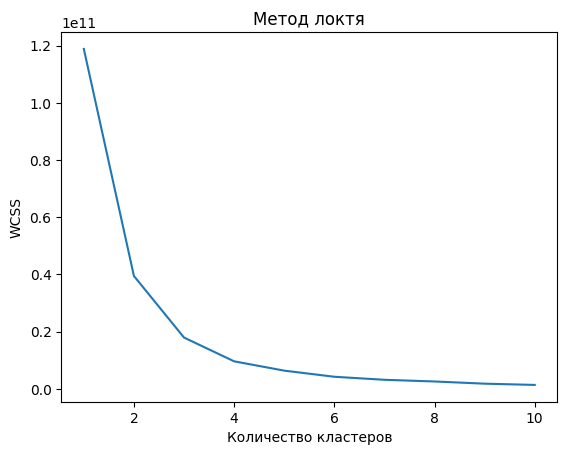

In [49]:
# расчет методом локтя
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [54]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans_silhouette = silhouette_score(X, kmeans.labels_)
kmeans_calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
kmeans_davies_bouldin = davies_bouldin_score(X, kmeans.labels_)


c:\Users\Наташа\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
kmeans.cluster_centers_

array([[9.12413793e+00, 1.53344828e+02, 2.74741379e+02, 3.51207069e+04],
       [3.68888889e+00, 2.41222222e+02, 4.30555556e+02, 1.02007444e+05],
       [5.73548387e+00, 1.95548387e+02, 3.99677419e+02, 6.29174516e+04],
       [4.32000000e+00, 2.66000000e+02, 5.39000000e+02, 1.68616400e+05]])

In [65]:
kmeans.cluster_centers_
round(np.linalg.norm(kmeans.cluster_centers_),3)

209833.221

In [66]:
import numpy as np
from scipy.sparse.linalg import svds


ratings = np.array([[3, 1, 0, 1],
               	[0, 3, 0, 1],
               	[1, 2, 0, 5],
               	[1, 0, 0, 2],
               	[0, 1, 3, 1]]).astype(float)

In [68]:
U, S, Vt = svds(ratings, k=2)
S_diag = np.diag(S)
predicted_ratings = np.dot(np.dot(U, S_diag), Vt)


In [67]:
import numpy as np

image = np.array([[1, 2, 1, 1, 3],
              	  [0, 1, 2, 3, 4],
              	  [0, 0, 1, 2, 3],
              	  [3, 2, 1, 5, 0],
              	  [1, 2, 3, 1, 7]])

filter = np.array([[1, 0, 1],
               	  [0, 1, 0],
               	  [1, 0, 1]])


In [69]:
feature_map = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        feature_map[i][j] = np.sum(image[i:i+3, j:j+3] * filter)
print(feature_map)


[[ 4.  7. 11.]
 [ 6. 12.  9.]
 [ 7.  6. 19.]]
